# Assignment 2

#### Student ID: *M112040034*

#### Name: *李祐瑄*

Firstly, install the following dependencies:

In [1]:
!pip install shap -qq
!pip install lime -qq
!pip install imodels -qq
!pip install pyngrok -qq
!pip install cleanlab -q
!pip install dtreeviz -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.5/195.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.8/175.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.6 MB/s eta 0:00:00


If you are using Colab or Kaggle notebook, try to install tensorflow-model-server and set up the tunnel using the following commands:

In [2]:
!pip install ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.0 MB/s eta 0:00:00


In [3]:
import sys
from pyngrok import ngrok, conf
import getpass

if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    url = "https://storage.googleapis.com/tensorflow-serving-apt"
    src = "stable tensorflow-model-server tensorflow-model-server-universal"
    !echo 'deb {url} {src}' > /etc/apt/sources.list.d/tensorflow-serving.list
    !curl '{url}/tensorflow-serving.release.pub.gpg' | apt-key add -
    !apt update -q && apt-get install -y tensorflow-model-server
    %pip install -q -U tensorflow-serving-api

    print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
    conf.get_default().auth_token = getpass.getpass()

    # Setup a tunnel to the streamlit port 8050
    public_url = ngrok.connect(8050)

    print(public_url)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  11063      0 --:--:-- --:--:-- --:--:-- 11063
OK
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:5 https://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [77.6 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease

NgrokTunnel: "https://5b61-35-231-157-134.ngrok-free.app" -> "http://localhost:8050"


For this assignment, besides the labs, you may find the assignments in the previous offering useful https://phonchi.github.io/nsysu-math604/.

In [5]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

## Q1: Data cleaning with colic dataset

<center><img src="https://cdn.leonardo.ai/users/f26a2ba8-8273-45e9-8db9-958f83058486/generations/97af1bc3-e1b5-4c6a-84a7-3a8e7a37e97f/Default_Horse_medical_records_and_doctor_0.jpg"></center>

In this problem, we will deal with a colic dataset modified from https://www.kaggle.com/datasets/uciml/horse-colic from our customer. It presents the medical attributes of horses afflicted by colic, detailing their survival outcomes and comprises 300 instances and 26 input variables, along with a single output variable. We will predict whether the problem was surgical or not, making it a binary classification problem. Notably, a significant number of missing values appear across various columns, denoted by a question mark character ("?"). 

Firstly, execute the following code snippet for data preparation:

In [36]:
# Function for comparing different approaches
def scoring_accuracy(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(random_state=2023)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/Gratia2533/Practical-Class/main/NSYSU/%E6%95%B8%E6%93%9A%E7%A7%91%E5%AD%B8/Assignment2/colic.csv', na_values='?')
data.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

In [38]:
# To keep things simple, we'll split the columns into numerical can categorical features
mapping_dict = {
    'no': 0,
    'yes': 1
}

data["surgical_lesion"] = data["surgical_lesion"].replace(mapping_dict)
y = data["surgical_lesion"]
data = data.drop("surgical_lesion", axis=1)
num_col = data.select_dtypes(exclude=['object'])
cat_col = data.select_dtypes(exclude=['int64','float64'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(data, y, train_size=0.8, test_size=0.2, random_state=0)
X_train_num = X_train.select_dtypes(exclude=['object'])
X_valid_num = X_valid.select_dtypes(exclude=['object'])
X_train_cat = X_train.select_dtypes(exclude=['int64','float64'])
X_valid_cat = X_valid.select_dtypes(exclude=['int64','float64'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


To ensure reproducibility, please set all the random seeds to 2023:

#### (a) To simplify the problem, we will consider only the numerical columns first. We will compare the model accuracy between the three data-cleaning approaches. (10%)

1. Replace missing values with the mean value along each column using `SimpleImputer()`.
2. Use the KNN imputation with 3 neighbors using `KNNImputer()`.
3. Use the iterative imputation method and set the regressor as Radnomforest using `IterativeImputer()`.

Use the `scoring_accuracy()` function provided above to perform classification and calculate the accuracy for each approach. Finally, make some comments on the results.

Hint: Since we are working with both training and validation sets, you should apply the same transform when you impute the missing value for both sets.

In [9]:
# Simple Imputation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
si = SimpleImputer(strategy='mean')
X_train_num_imputed_si = si.fit_transform(X_train_num)
X_valid_num_imputed_si = si.transform(X_valid_num)
accuracy_si = scoring_accuracy(X_train_num_imputed_si, X_valid_num_imputed_si, y_train, y_valid)
print('Accuracy with SimpleImputer:', round(accuracy_si,3))

Accuracy with SimpleImputer: 0.867


In [10]:
# KNN Imputation
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
X_train_num_imputed_knn = knn.fit_transform(X_train_num)
X_valid_num_imputed_knn = knn.transform(X_valid_num)
accuracy_knn = scoring_accuracy(X_train_num_imputed_knn, X_valid_num_imputed_knn, y_train, y_valid)
print('Accuracy with KNNImputer:', round(accuracy_knn,3))

Accuracy with KNNImputer: 0.867


In [11]:
# Iterative Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2023)
ii = IterativeImputer(random_state=2023, estimator=rf)
X_train_num_imputed_ii = ii.fit_transform(X_train_num)
X_valid_num_imputed_ii = ii.transform(X_valid_num)
accuracy_ii = scoring_accuracy(X_train_num_imputed_ii, X_valid_num_imputed_ii, y_train, y_valid)
print('Accuracy with IterativeImputer:', round(accuracy_ii,3))

Accuracy with IterativeImputer: 0.883


> Ans: 比較以上三種數據清洗方法的準確率，Simple和KNN為0.867，而Iterative則是最高的0.883





#### (b) Now, we will add categorical variables into consideration. Try to:

* Replace missing values with the most frequent value along each column for categorical variables. 
* Perform label (ordinal) encoding for the categorical variables. 
* When there are unknown categories in the validation set, set it to -1 for the label encoding.
* Use the best approach you found in (a) to impute the numerical column.

Combining the transformation above, which contains a separate numerical and categorical pipeline to the original training and validation data split (`X_train` and `X_valid`) and using the `scoring_accuracy()` function to calculate the accuracy. Make some comments on the results when comparing with (a). (10%)

Hint: Since we are working with both training and validation sets, try to apply the same transform when you impute the missing data or encode the variables. You may find [ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html), [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and the [`handle_unknown`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) option in the encoder useful.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

random_state=2023
# 用類別變量的最常見值替換缺失值
cat_imputer = SimpleImputer(strategy='most_frequent')

# Label encode 類別變量
cat_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', LabelEncoder())
])

# Ordinal encode 類別變量，用-1處理未知類別
cat_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# 使用 IterativeImputer 估算數值變量中的缺失值
num_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=RandomForestRegressor(), random_state=2023)),
])
# 定義Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col.columns),
        ('cat', cat_ordinal, cat_col.columns)
    ])

# 使用preprocessor和RF分類器創建pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=2023))
])

# 訓練模型並預測結果
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)
# 計算準確率
accuracy = scoring_accuracy(X_train_transformed, X_valid_transformed, y_train, y_valid)
print("Accuracy:", round(accuracy,4))



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Accuracy: 0.9167


> Ans: 比(a)最好的方法KNN & Iterative的0.883還要更好，Accuracy為0.9167

#### (c) Use `CleanLearning` with `RandomForestClassifier` to fit the cleaned training you obtained in (b) (i.e., after imputation and encoding). Then, calculate the accuracy of the validation set. Finally, report the possible label issue in the training set using `cleanlab.dataset.health_summary()`. (10%)

In [41]:
from cleanlab.classification import CleanLearning 
from sklearn.ensemble import RandomForestClassifier
from cleanlab.dataset import health_summary


# 建立RF model
rfc_model = RandomForestClassifier(random_state=2023)

# 使用CleanLearning去fit清洗好的訓練資料
clean_model = CleanLearning(clf=rfc_model)
clean_model.fit(X_train_transformed, y_train)

# 在驗證集上進行預測
y_pred = clean_model.predict(X_valid_transformed)

# 計算在驗證集上的準確率
accuracy = scoring_accuracy(X_train_transformed, X_valid_transformed, y_train, y_valid)
print("Accuracy:", round(accuracy,4))

# 查看訓練集中可能有的label issue
print(health_summary(y_train, X_train_transformed))



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Accuracy: 0.9167
---------------------------------------------------------
|  Generating a Cleanlab Dataset Health Summary         |
|   for your dataset with 240 examples and 27 classes.  |
|  Note, Cleanlab is not a medical doctor... yet.       |
---------------------------------------------------------

Overall Class Quality and Noise across your dataset (below)
------------------------------------------------------------ 



invalid value encountered in true_divide
invalid value encountered in true_divide


Class Index  Label Issues  Inverse Label Issues  Label Noise  \
0             1           148                     0     0.993289   
1             0             0                   148     0.000000   
2             2             0                     0          NaN   
3             3             0                     0          NaN   
4             4             0                     0          NaN   
5             5             0                     0          NaN   
6             6             0                     0          NaN   
7             7             0                     0          NaN   
8             8             0                     0          NaN   
9             9             0                     0          NaN   
10           10             0                     0          NaN   
11           11             0                     0          NaN   
12           12             0                     0          NaN   
13           13             0                     0          NaN   
14           14             0                     0          NaN   
15           15             0                     0          NaN   
16           16             0                     0          NaN   
17           17             0                     0          NaN   
18           18             0                     0          NaN   
19           19             0                     0          NaN   
20           20             0                     0          NaN   
21           21             0                     0          NaN   
22           22             0                     0          NaN   
23           23             0                     0          NaN   
24           24             0                     0          NaN   
25           25             0                     0          NaN   
26           26             0                     0          NaN   

    Inverse Label Noise  Label Quality Score  
0              0.000000             0.006711  
1              0.619247             1.000000  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  
5                   NaN                  NaN  
6                   NaN                  NaN  
7                   NaN                  NaN  
8                   NaN                  NaN  
9                   NaN                  NaN  
10                  NaN                  NaN  
11                  NaN                  NaN  
12                  NaN                  NaN  
13                  NaN                  NaN  
14                  NaN                  NaN  
15                  NaN                  NaN  
16                  NaN                  NaN  
17                  NaN                  NaN  
18                  NaN                  NaN  
19                  NaN                  NaN  
20                  NaN                  NaN  
21                  NaN                  NaN  
22                  NaN                  NaN  
23                  NaN                  NaN  
24                  NaN                  NaN  
25                  NaN                  NaN  
26                  NaN                  NaN


Class Overlap. In some cases, you may want to merge classes in the top rows (below)
-----------------------------------------------------------------------------------



Class Index A  Class Index B  Num Overlapping Examples  Joint Probability
0                0              1                       148           0.616667
1               11             12                         0           0.000000
2               11             20                         0           0.000000
3               11             19                         0           0.000000
4               11             18                         0           0.000000
..             ...            ...                       ...                ...
346              4             22                         0           0.000000
347              4             21                         0           0.000000
348              4             20                         0           0.000000
349              4             19                         0           0.000000
350             25             26                         0           0.000000

[351 rows x 4 columns]


 * Overall, about 62% (148 of the 240) labels in your dataset have potential issues.
 ** The overall label health score for this dataset is: 0.38.

Generated with <3 from Cleanlab.

{'overall_label_health_score': 0.3833333333333333, 'joint': array([[0.37916667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.61666667, 0.00416667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0. 

> Ans:在驗證集上的準確率有0.9167

以下為health_summary輸出結果

1.約有62%(148個)的label有潛在問題

2.訓練集的整體label健康得分為0.38

3.訓練集中69類中有一些有重疊。



## Q2. Feature engineering and selection with Ames housing dataset

In this question, we are going to examine several feature engineering and feature selection methods.

The dataset is from our previous project, which is a modified version of the Ames housing dataset. The original data was compiled by Dean De Cock for use in data science education and published in [De Cock, D. (2011)](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). The modified version contains 2930 rows with 79 columns describing every aspect of residential homes in Ames, Iowa. The target of this problem is the `SalePrice`, while all the other columns are treated as features.

Firstly, execute the following code snippet for data preparation:

In [14]:
# Function for comparing different approaches with cross validation
def score_dataset(X, y, pipeline):
    # See https://stats.stackexchange.com/questions/27750/feature-selection-and-cross-validation
    # , https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after
    # and https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine

    # For simplicity, we perform label encoding for categoricals here, though it may be better to put it in pipline
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        pipeline, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

df = pd.read_csv("https://raw.githubusercontent.com/Gratia2533/Practical-Class/main/NSYSU/%E6%95%B8%E6%93%9A%E7%A7%91%E5%AD%B8/Assignment2/ames.csv")
X = df.copy()
y = X.pop('SalePrice')

X.head()

MSSubClass                  MSZoning  LotFrontage  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density        141.0   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density         80.0   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         81.0   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density         93.0   
4             Two_Story_1946_and_Newer   Residential_Low_Density         74.0   

   LotArea Street            Alley            LotShape LandContour Utilities  \
0  31770.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
1  11622.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
2  14267.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   
3  11160.0   Pave  No_Alley_Access             Regular         Lvl    AllPub   
4  13830.0   Pave  No_Alley_Access  Slightly_Irregular         Lvl    AllPub   

  LotConfig  ... ScreenPorch PoolArea   PoolQC            Fence MiscFeature  \
0    Corner  ...         0.0      0.0  No_Pool         No_Fence        None   
1    Inside  ...       120.0      0.0  No_Pool  Minimum_Privacy        None   
2    Corner  ...         0.0      0.0  No_Pool         No_Fence        Gar2   
3    Corner  ...         0.0      0.0  No_Pool         No_Fence        None   
4    Inside  ...         0.0      0.0  No_Pool  Minimum_Privacy        None   

   MiscVal MoSold YearSold  SaleType  SaleCondition  
0      0.0      5     2010       WD          Normal  
1      0.0      6     2010       WD          Normal  
2  12500.0      6     2010       WD          Normal  
3      0.0      4     2010       WD          Normal  
4      0.0      3     2010       WD          Normal  

[5 rows x 78 columns]

To ensure reproducibility, please set all the random seeds to 2023:

#### (a) The Ames dataset has a lot of features! Fortunately, you can identify the features with the most potential and use the filtering method. To start with, report the mutual information between the target and each feature in descending order using the `mutual_info_regression()` function on the original dataset `X`. Then, build a pipeline that selects the best 10 features and transforms the dataset using `SelectKBest()` function and fits the resulting dataset using Random forest. Calculate the RMSLE on the transformed dataset using the `score_dataset()`. (10%)


Hint: Since we are working with both training and validation sets, you may find [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) useful.

         feature  mi_score
78     SalePrice  5.921132
16   OverallQual  0.582548
11  Neighborhood  0.561522
45     GrLivArea  0.496516
60    GarageArea  0.414280
..           ...       ...
70        PoolQC  0.000000
72   MiscFeature  0.000000
73       MiscVal  0.000000
74        MoSold  0.000000
44  LowQualFinSF  0.000000

[79 rows x 2 columns]


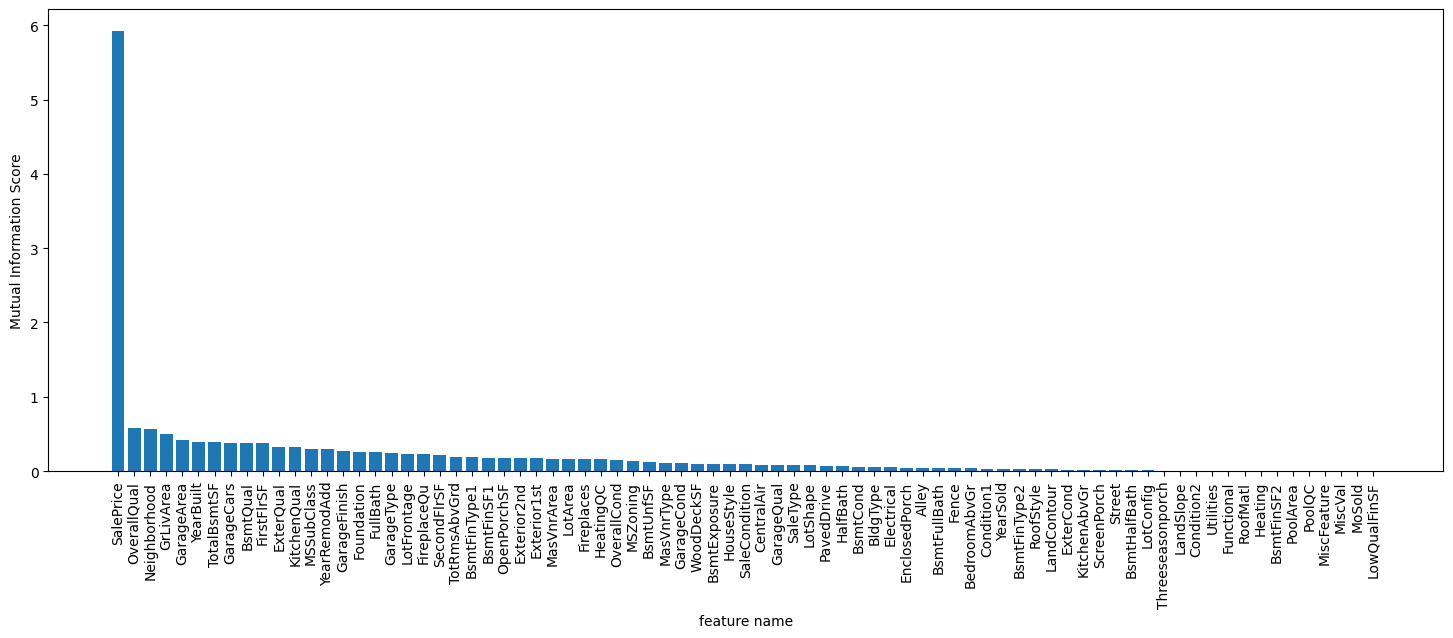

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


RMSLE: 0.1683


In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

local_X = df.copy()
# 處理類別型態的特徵(使用Label Encode)
for colname in local_X.select_dtypes(["category", "object"]):
    local_X[colname] = LabelEncoder().fit_transform(local_X[colname])

# 計算所有特徵與目標便亮的mutual information
mi_scores = mutual_info_regression(local_X, y)
# 建立一個dataframe去存放特徵名稱和mutual information scores
mi_scores_df = pd.DataFrame({'feature': local_X.columns, 'mi_score': mi_scores})
# 對mutual information score進行降冪排列
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)
print(mi_scores_df)
# Plot the mutual information scores as a bar chart
plt.figure(figsize=(18, 6))
plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
plt.xticks(rotation=90)
plt.xlabel("feature name")
plt.ylabel('Mutual Information Score')
plt.show()

# 定義pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(k=10)),
    ('model', RandomForestRegressor(random_state=2023))
])

# 計算transformed dataset的RMSLE
rmsle = score_dataset(X, y, pipeline)

# Print the RMSLE
print('RMSLE:', round(rmsle,4))

#### (b) Next, we'll rely on PCA to try to untangle the correlational structure of these features. Firstly, apply PCA on the dataset `X` and plot the cumulative explain variance using `pca()`. Then, build a pipeline that selects the number of components so that the cumulative explained variance is just above 90%  and fits the resulting dataset using Random forest. Calculate the RMSLE on the transformed dataset using the `score_dataset()`. (10%)

Hint: PCA is scale sensitive. Therefore, you must standardize the dataset before performing PCA by putting it into the pipeline. Since we are working with both training and validation sets, you may find [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) useful.

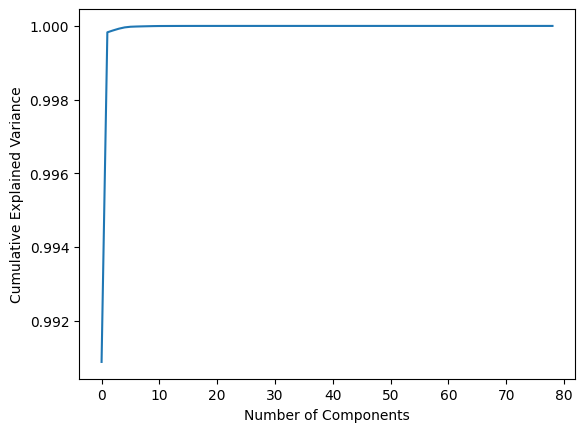

RMSLE on the transformed dataset: 0.1606


In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(local_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
# 標準化dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 定義pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', PCA(n_components=0.9)),
    ('select', SelectKBest(k=10)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2023))
])

# 計算transformed dataset的RMSLE
rmsle = score_dataset(X, y, pipeline)
print(f"RMSLE on the transformed dataset:", round(rmsle,4))

#### (c) Finally, we will explore the embedding method. Try to build a pipeline that selects features using `SelectFromModel()` with the feature importance provided by `RandomForestRegressor` and fits the resulting dataset using Random forest. Then, calculate the RMSLE on the transformed dataset using the `score_dataset()`. Finally, comment on the results obtained by comparing it with (a) and (b). (10%)

Hint: You do not need to specify `threshold` or `max_features`; just use the default value to determine the number of features automatically. Since we are working with both training and validation sets, you may find [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) useful.

In [17]:
from sklearn.feature_selection import SelectFromModel
pipeline = Pipeline([
('select', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=2023))),
('rf', RandomForestRegressor(n_estimators=100, random_state=2023))
])
rmsle = score_dataset(X, y, pipeline)
print(f"RMSLE on the transformed dataset:", round(rmsle,4))

RMSLE on the transformed dataset: 0.1563


> Ans: RMSLE:(a)0.1683, (b)0.1606, (c)0.1563

對於(a)、(b)和(c)三種方法，我們使用了不同的特徵選擇和轉換技術，然後在RandomForestRegressor上擬合模型，計算RMSLE。

這些方法可以幫助我們找到較好的特徵集，進而提高模型的預測性能，而(c)所使用的方法誤差最小為0.1563。

## Q3: Analyze breast cancer dataset with interpretable methods

Assume that there is a center that consults us to diagnose breast cancer and has digitized the images of the breast from around 570 patients. Features were computed from these digitized images that described the characteristics of cell nuclei in the images. For each cell nucleus, 10 features are used to describe its characteristics. For all the nuclei present in an image of a patient, the mean, standard error, and the largest or worst values are computed for each of these 10 features. Each patient, therefore, has 30 features in total. Given these input features, the goal of the system is to predict whether the cell is benign or malignant and to provide a confidence score for the doctor to help with their diagnosis.



Firstly, execute the following code snippet for data preparation:

In [18]:
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=24)

In [19]:
X_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
416        9.405         21.70           59.60      271.2          0.10440   
389       19.550         23.21          128.90     1174.0          0.10100   
438       13.850         19.60           88.68      592.6          0.08684   
304       11.460         18.16           73.59      403.1          0.08853   
218       19.800         21.56          129.70     1230.0          0.09383   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
416           0.06159         0.02047              0.01257         0.2025   
389           0.13180         0.18560              0.10210         0.1989   
438           0.06330         0.01342              0.02293         0.1555   
304           0.07694         0.03344              0.01502         0.1411   
218           0.13060         0.12720              0.08691         0.2094   

     mean fractal dimension  ...  worst radius  worst texture  \
416                 0.06601  ...         10.85          31.24   
389                 0.05884  ...         20.82          30.44   
438                 0.05673  ...         15.63          28.01   
304                 0.06243  ...         12.68          21.61   
218                 0.05581  ...         25.73          28.64   

     worst perimeter  worst area  worst smoothness  worst compactness  \
416            68.73       359.4            0.1526             0.1193   
389           142.00      1313.0            0.1251             0.2414   
438           100.90       749.1            0.1118             0.1141   
304            82.69       489.8            0.1144             0.1789   
218           170.30      2009.0            0.1353             0.3235   

     worst concavity  worst concave points  worst symmetry  \
416          0.06141               0.03770          0.2872   
389          0.38290               0.18250          0.2576   
438          0.04753               0.05890          0.2513   
304          0.12260               0.05509          0.2208   
218          0.36170               0.18200          0.3070   

     worst fractal dimension  
416                  0.08304  
389                  0.07602  
438                  0.06911  
304                  0.07638  
218                  0.08255  

[5 rows x 30 columns]

To ensure reproducibility, please set all the random seeds to 2023:

#### (a) First, fit an interpretable model and show doctors some evidence the model is doing something in line with their medical intuition. (10%)

* Try to build a `FIGSClassifier()` decision rule model as a baseline and calculate the accuracy of the model on the validation set. Set the parameter [`max_rule`](https://csinva.io/imodels/tree/figs.html) to 5.
* Draw the feature importance plot using the [feature_importances_](https://csinva.io/imodels/tree/figs.html#imodels.tree.figs.FIGS.feature_importances_) and find out the most important feature.
* Now, a patient (The data is recorded in the first row in the test dataset with id `331`) comes in, and he/she would like to know why he/she got (or does not get) breast cancer. Use the rule generated from the model to give him/her some reasons. You may also use a tree to visualize the decision path.

Accuracy on validation set: 0.976


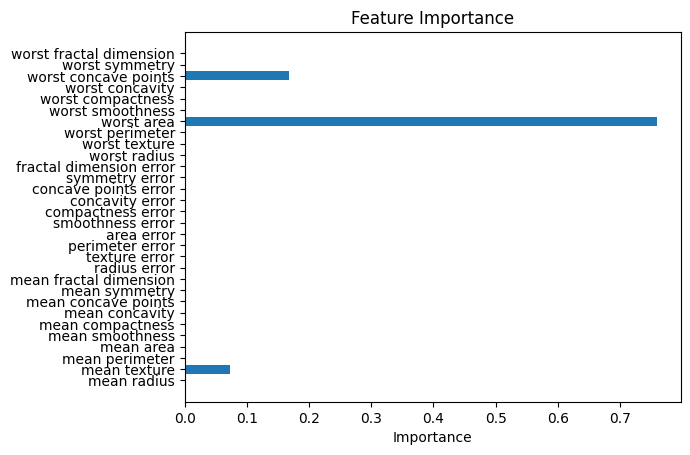

Most important feature: worst area
The model predicts that the patient(ID:331) is Benign.


In [20]:
from imodels import FIGSClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fit the FIGSClassifier model with max_rule=5
model = FIGSClassifier(max_rules=5, max_features=X_train.shape[1])
model.fit(X_train, y_train)

# 在測試集上計算model的Accuracy
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.3f}")

# 繪製特徵重要性圖
importances = model.feature_importances_
plt.barh(X_train.columns, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

# 輸出最重要的特徵
most_important_feature = X_train.columns[importances.argmax()]
print(f"Most important feature: {most_important_feature}")

# 用模型去看ID為331的病人是不是有癌症
patient_data = X_test.loc[[331]]
prediction = model.predict(patient_data)[0]
if prediction == 0:
    print("The model predicts that the patient(ID:331) is Malignant.")
else:
    print("The model predicts that the patient(ID:331) is Benign.")

mean radius                 12.980000
mean texture                19.350000
mean perimeter              84.520000
mean area                  514.000000
mean smoothness              0.095790
mean compactness             0.112500
mean concavity               0.071070
mean concave points          0.029500
mean symmetry                0.176100
mean fractal dimension       0.065400
radius error                 0.268400
texture error                0.566400
perimeter error              2.465000
area error                  20.650000
smoothness error             0.005727
compactness error            0.032550
concavity error              0.043930
concave points error         0.009811
symmetry error               0.027510
fractal dimension error      0.004572
worst radius                14.420000
worst texture               21.950000
worst perimeter             99.210000
worst area                 634.300000
worst smoothness             0.128800
worst compactness            0.325300
worst concav

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


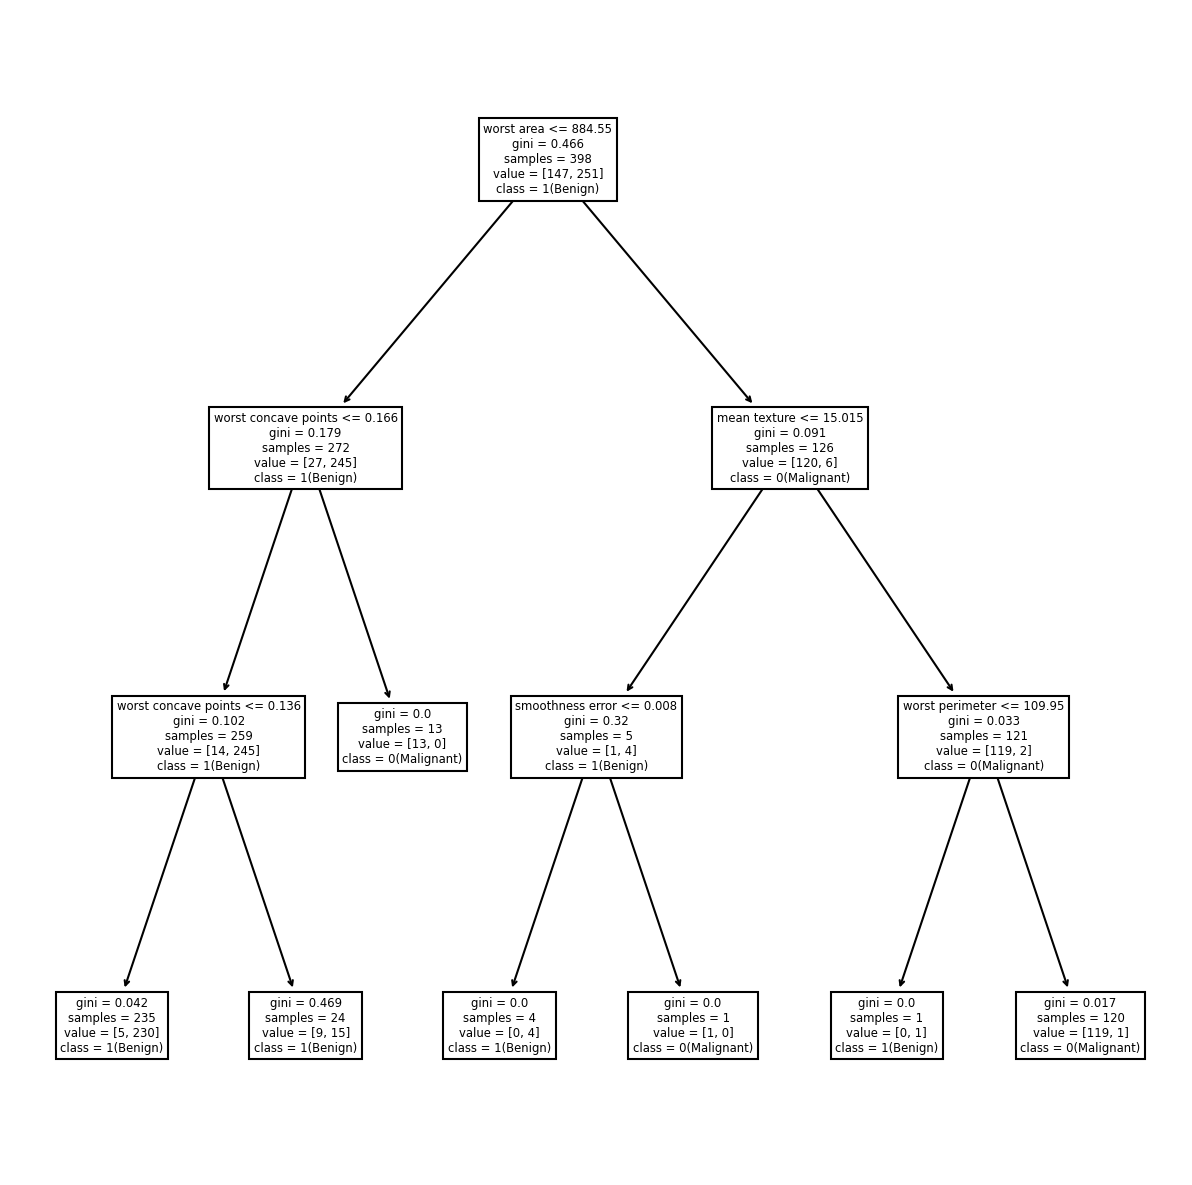

|--- worst area <= 884.55
|   |--- worst concave points <= 0.17
|   |   |--- worst concave points <= 0.14
|   |   |   |--- class: 1
|   |   |--- worst concave points >  0.14
|   |   |   |--- class: 1
|   |--- worst concave points >  0.17
|   |   |--- class: 0
|--- worst area >  884.55
|   |--- mean texture <= 15.02
|   |   |--- smoothness error <= 0.01
|   |   |   |--- class: 1
|   |   |--- smoothness error >  0.01
|   |   |   |--- class: 0
|   |--- mean texture >  15.02
|   |   |--- worst perimeter <= 109.95
|   |   |   |--- class: 1
|   |   |--- worst perimeter >  109.95
|   |   |   |--- class: 0



'\ntree_model = DecisionTreeClassifier(random_state=2023, max_depth=3, min_samples_split=5).fit(X_train, y_train)\n\ntree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)\ngraphviz.Source(tree_graph)\nplt.show()\ntree_rules = export_text(tree_model, feature_names=list(X_train.columns))\nprint(tree_rules)\n'

In [21]:
#列出ID331病人的數據
print(X.loc[331])
# 畫出決策樹圖
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text
from sklearn import tree
import graphviz
import dtreeviz

dt_model = DecisionTreeClassifier(random_state=2023, max_depth=3, min_samples_split=5).fit(X_train, y_train)

plt.figure(figsize=(10, 10),dpi=150)
plot_tree(dt_model, feature_names=X_train.columns, class_names=["0(Malignant)", "1(Benign)"])
plt.show()
#印出決策樹規則
tree_rules = export_text(dt_model, feature_names=list(X_train.columns))
print(tree_rules)
'''
tree_model = DecisionTreeClassifier(random_state=2023, max_depth=3, min_samples_split=5).fit(X_train, y_train)

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)
plt.show()
tree_rules = export_text(tree_model, feature_names=list(X_train.columns))
print(tree_rules)
'''

> Ans: 使用FIGSClassifier()建構的模型，在測試集上的準確率有0.976

從Importance plot可以看出最重要的特徵為"worst area"

> 那ID:331的患者被預測是良性的(target=1)，從決策樹(規則)可以試圖去找到原因

從第一個節點看worst area：634.3(ID:331) < 884.55(Rule)，

第二個節點worst concave points: 0.09858(ID:331) < 0.17(Rule)

因此被預測為class = 1，所以模型預測ID:331的病人為良性


#### (b) The doctor is glad you convinced the patients and would like to know more. It appears `worst area` of the cell is a critical feature, and the doctors would like to know more about that. (10%)

* Divide the original data `X` into two datasets, Benign (Target equals 1) and Malignant (Target equals 0), respectively. Draw the distribution of the `worst area` for these two datasets.
* Create a partial dependence plot for them that shows how `worst area` of the cell affects the model's predictions. (You should use the validation set to generate the plot)
* Comment on your results based on the previous two items about how `worst area` of the cell affect the predictions. Is it consistent with the results from (a)?

In [22]:
feature_names = [i for i in X.columns if X[i].dtype in [np.float64]]
feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


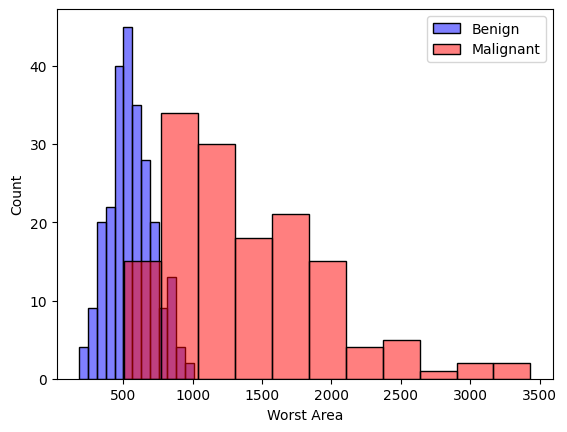

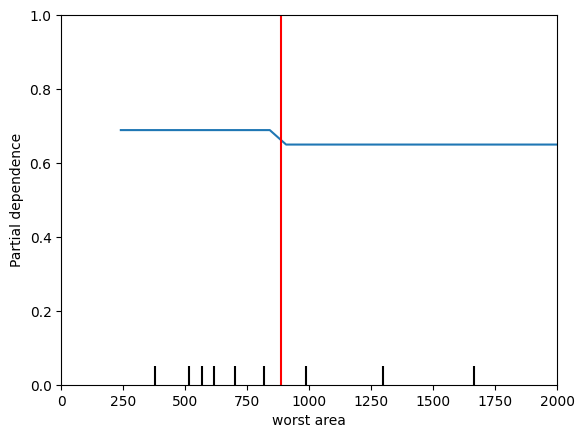

In [23]:
# Divide the original data X into two datasets, Benign (Target equals 1) and Malignant (Target equals 0), respectively
X_benign = X_train[y_train==1]
X_malignant = X_train[y_train==0]
import seaborn as sns

sns.histplot(X_benign['worst area'], color='blue', alpha=0.5, label='Benign')
sns.histplot(X_malignant['worst area'], color='red', alpha=0.5, label='Malignant')
plt.xlabel('Worst Area')
plt.ylabel('Count')
plt.legend()
plt.show()
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

PartialDependenceDisplay.from_estimator(dt_model, X_val, features = ['worst area'], feature_names=feature_names)
plt.ylim(0,1)
plt.xlim(0,2000)
plt.axvline(x=884.55, color='red')
plt.show()


> Ans: 從特徵重要性的圖中，可以得到最重要的特徵為"worst area"


而從決策樹的部分，可以看到分界的值為884.55，

而對應Partial Dependence plot(圖中紅色線表示在X軸上884.55的位置)，也剛好是圖形變化的位置。

#### (c) The doctor is glad about the results, but he/she is still worried about the model performance of the model you just built.  (5%)

* Try to build a more complicated classifier based on a deep neural network (DNN) and train it using the following code. 
* Then report the accuracy on the validation set and test set.
* Find out the patients that the model is most confident and least confident based on the probability from `model.predict()`, and report their index.

In [24]:
tf.keras.utils.set_random_seed(2023)
# Create a sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Dense(20, input_dim=30, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model summary
model.summary()

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model for 300 epochs and track the history
num_epochs = 300
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/lib/python3.10/random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
/usr/lib/python3.10/random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
/usr/lib/python3.10/random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
/usr/lib/python3.10/random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be remove

Epoch 1/300
13/13 [==============================] - 2s 34ms/step - loss: 125.7230 - accuracy: 0.6307 - val_loss: 96.5414 - val_accuracy: 0.6118
Epoch 2/300
13/13 [==============================] - 0s 10ms/step - loss: 60.9718 - accuracy: 0.6307 - val_loss: 33.0757 - val_accuracy: 0.6118
Epoch 3/300
13/13 [==============================] - 0s 9ms/step - loss: 13.5761 - accuracy: 0.6307 - val_loss: 2.3868 - val_accuracy: 0.6588
Epoch 4/300
13/13 [==============================] - 0s 10ms/step - loss: 1.0125 - accuracy: 0.8166 - val_loss: 0.6521 - val_accuracy: 0.7412
Epoch 5/300
13/13 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.8995 - val_loss: 0.5987 - val_accuracy: 0.9412
Epoch 6/300
13/13 [==============================] - 0s 9ms/step - loss: 0.6130 - accuracy: 0.8593 - val_loss: 0.5511 - val_accuracy: 0.8588
Epoch 7/300
13/13 [==============================] - 0s 8ms/step - loss: 0.5704 - accuracy: 0.8040 - val_loss: 0.5415 - val_accuracy: 0.8353
Epo

In [25]:
# 計算模型在驗證集與測試及上的準確率
val_loss, val_acc = model.evaluate(X_val, y_val)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Validation accuracy: {val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

probs_val = model.predict(X_val)

# 機率最高的患者index
most_confident_idx = np.argmax(probs_val)
# 機率最低的患者index
least_confident_idx = np.argmin(probs_val)

print("Index of patient with the highest probability: ", most_confident_idx,"with",probs_val[most_confident_idx])
print("Index of patient with the lowest probability: ", least_confident_idx,"with",probs_val[least_confident_idx])



3/3 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.9419


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Validation accuracy: 0.9294
Test accuracy: 0.9419
3/3 [==============================] - 0s 3ms/step
Index of patient with the highest probability:  4 with [0.99997324]
Index of patient with the lowest probability:  2 with [0.11149835]


> Ans:

Validation accuracy: 0.9294

Test accuracy: 0.9419

有最高信心的患者為ID是4的，有最低信心的患者為ID是2的

#### (d) Use Lime and Shap to explain the two patients you find in (c)
* Create the [`lime_tabular.LimeTabularExplainer()`](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular) and use [`explain_instance()`](https://lime-ml.readthedocs.io/en/latest/lime.html#lime.lime_tabular.LimeTabularExplainer.explain_instance) to explain the two instance. Then, draw the local explanation for these two instances by showing the most important five features.
* Create the [`KernelExplainer()`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html#) using `shap` with the following argument, where `prob` is also defined below:  (15%)

```python
KernelExplainer(prob, X_train.to_numpy(), link="logit")

def prob(data):
    return model.predict(data).reshape(-1, 1)
```
* Using the above [`KernelExplainer()`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html#) to explain the two instances by calculating the shap value and draw the force plots for them using [`shap.force_plot()`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html). You can set the parameter [`nsamples`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html#shap.KernelExplainer.shap_values) to 100 to speed up the calculation.
* Based on the results of `lime` and `shap` explain why these two patients got (or does not get) breast cancer. Do the results consistent with (a) and (b)?

explanation for most confident


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


157/157 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


Intercept 0.5986760362240785
Prediction_local [0.46105616]
Right: 0.9709265


explanation for least confident
157/157 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


Intercept 0.5404806186245564
Prediction_local [0.66828208]
Right: 0.99979615


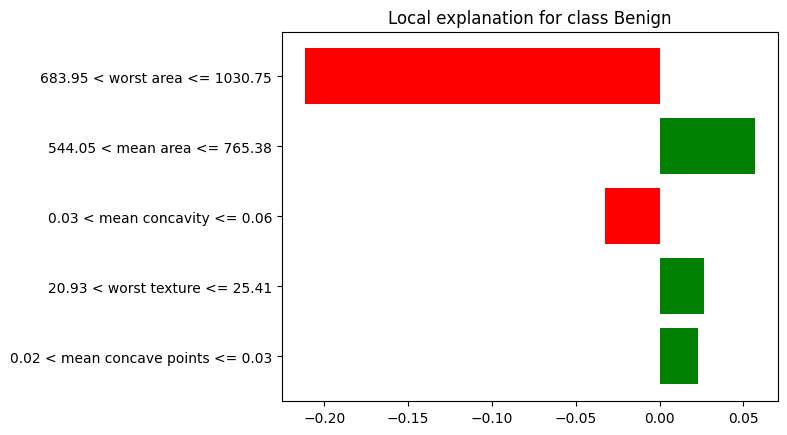

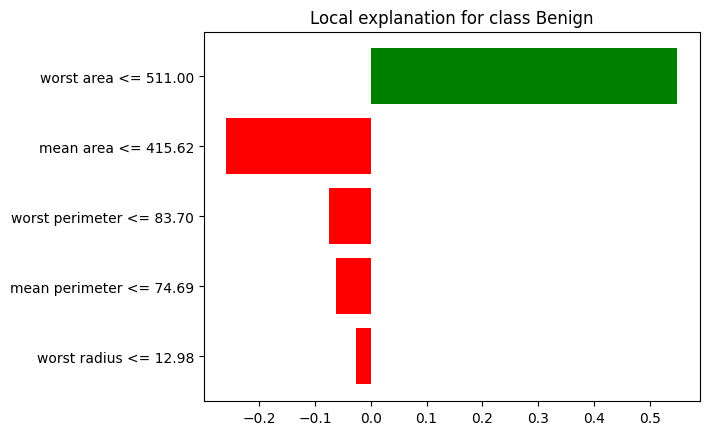

In [26]:
import lime
import lime.lime_tabular

# Lime explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), class_names=['Benign', 'Malignant'], verbose=True, mode='classification', feature_names=feature_names)
print("explanation for most confident")
exp_most = explainer.explain_instance(X_test.iloc[most_confident_idx], model.predict, num_features=5, top_labels=1)
exp_most.show_in_notebook(show_table=True, show_all=False)
fig = exp_most.as_pyplot_figure(label=0)
print("explanation for least confident")
exp_least = explainer.explain_instance(X_test.iloc[least_confident_idx], model.predict, num_features=5, top_labels=1)
exp_least.show_in_notebook(show_table=True, show_all=False)
fig = exp_least.as_pyplot_figure(label=0)

In [27]:
#Shap
import shap

def prob(data):
    return model.predict(data).reshape(-1, 1)
# Create the explainer
explainer = shap.KernelExplainer(prob, X_train.to_numpy(), link="logit", class_names=['benign', 'malignant'])

# Explain the most confident patient
shap_values_most_confident = explainer.shap_values(X_val.iloc[most_confident_idx], nsamples=100)

# Explain the least confident patient
shap_values_least_confident = explainer.shap_values(X_val.iloc[least_confident_idx], nsamples=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


13/13 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 239ms/step


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  76/1244 [>.............................] - ETA: 1s

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


1244/1244 [==============================] - 2s 1ms/step


In [28]:
# Draw the force plots for most confident
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values_most_confident[0], X_val.iloc[most_confident_idx])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [29]:
#Draw the force plots for least confident
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values_least_confident[0], X_val.iloc[least_confident_idx])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


> Ans:

#Part of Lime:
對most confident(在驗證集上)的病患而言:

模型有97%認為他是Benign，前五個主要的影響因素為worst area, mean area, worst perimeter, worst compactness, worst concavity
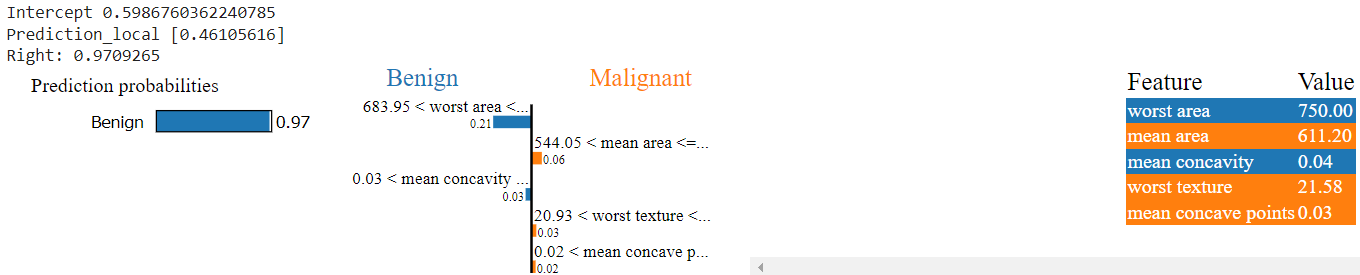

對least confident(在驗證集上)的病患而言:

模型有100%認為他是Benign，前五個主要的影響因素為worst area, mean area, worst perimeter, mean perimeter, worst texture
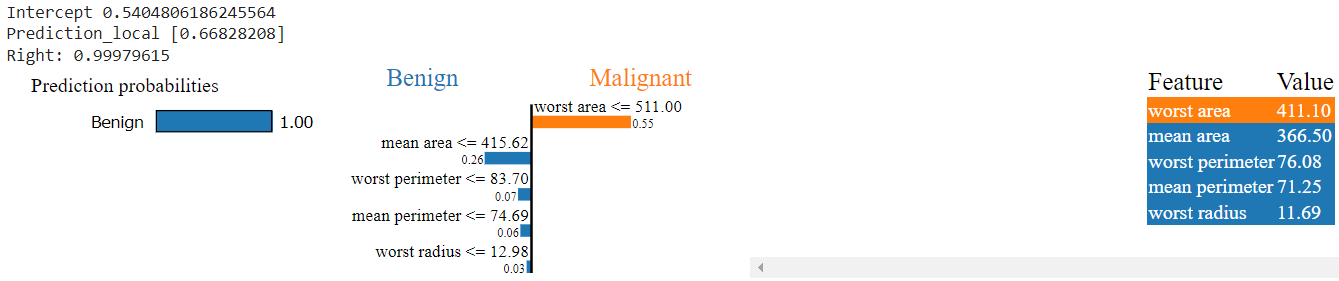

那最下面兩張圖，可以看到分別對於這兩個例子的病患，對於判斷成良性，對應的變數造成的影響(紅色為負影響、綠色為正影響)
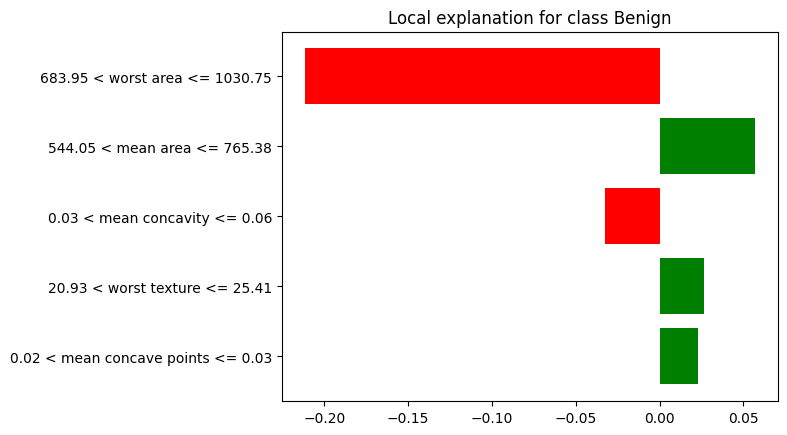
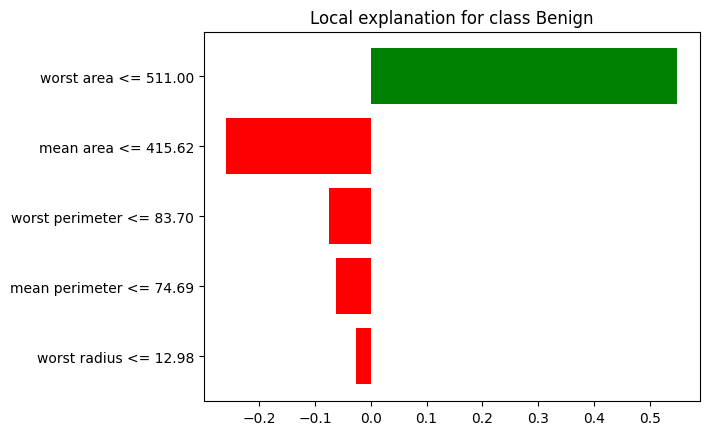
#Part of Shap:
紅色為對預測造成正影響，藍色的則為負影響，範圍佔越大表示影響程度越高

對most confident(在驗證集上)的病患而言:
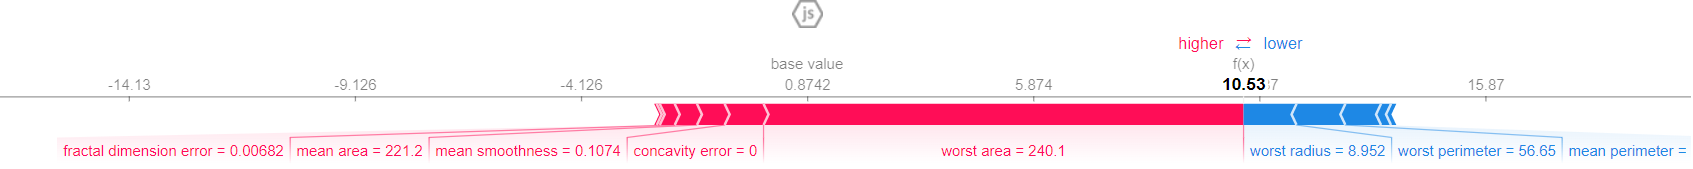

worst area造成的「正影響」最大

對least confident(在驗證集上)的病患而言:
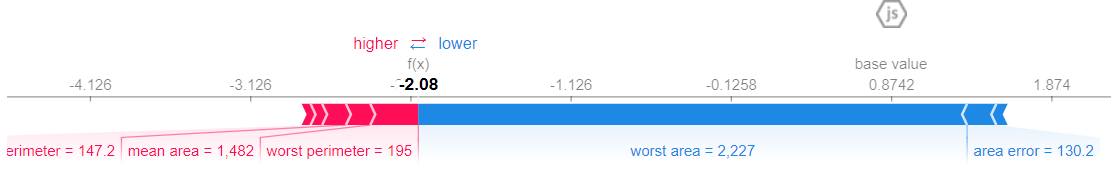
worst area造成的「負影響」最大

可以很明顯的看出在兩個病患上，其他特徵的影響遠不及"worst area"這個特徵，也呼應了前面(a),(b)用到的特徵重要性圖,決策樹及Partial Dependence plot等結果，但也只是同樣發現"worst area"是重要性很高的特徵，可是判斷的值有所差異。


#### (e) Now, the doctors are convinced you have the right data, and the model overview looks reasonable. It's time to turn this into a finished product they can use. (10%)
* Try to use `tf.keras.models.save_model()` to save your DNN model.
* Deploy your model as a REST API server using TensorFlow Serving with `tensorflow_model_server`. 
* Test your server by sending a request that contains the data of the previous two patients using `json.dumps()` and `requests.post()`. Show that the responses from the server are close to the predictions of the original model for these two patients using [`np.isclose()`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html).

Hint: Notice that the input to the DNN model should be with shape `(number of samples, number of features)` even if you feed a single instance.

# **遇到的問題是，localhost一直無法訪問**

In [30]:
model_version = '1'
model_dir = f"/content/model/{model_version}"
tf.saved_model.save(model, model_dir)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [31]:
!apt-get install tensorflow-model-server

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.12.0).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [32]:
!tensorflow_model_server --rest_api_port=8050 --model_name=breast_cancer --model_base_path=/content/model/

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...
^C


In [33]:
import json
import requests
import numpy as np
import os
import tensorflow as tf

model.save('model')  # 保存模型

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [34]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


--2023-04-30 11:10:26--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  15.2MB/s    in 0.9s    

2023-04-30 11:10:27 (15.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [35]:
import requests
import json
import numpy as np


# send POST request
response = requests.post('https://c80c-34-82-164-28.ngrok-free.app', json=data)

# encode response
predictions = json.loads(response.text)['predictions']

# valid result
y_pred = model.predict(X_val)
assert np.isclose(y_pred[most_confident_idx], predictions[0], rtol=1e-6, atol=1e-6).all()
assert np.isclose(y_pred[least_confident_idx], predictions[1], rtol=1e-6, atol=1e-6).all()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


TypeError: ignored